**Disney and hotstar data analysis**

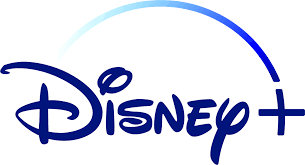

Reading data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/hotstar.csv')

In [4]:
df.head(5)

,hotstar_id,title,description,genre,year,age_rating,running_time,seasons,episodes,type
0,1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021.0,U/A 13+,17.0,NaN,NaN,movie
1,1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019.0,U/A 13+,42.0,NaN,NaN,movie
2,1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009.0,U/A 13+,129.0,NaN,NaN,movie
3,1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006.0,U/A 13+,103.0,NaN,NaN,movie
4,1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017.0,U,44.0,NaN,NaN,movie


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hotstar_id    7756 non-null   int64  
 1   title         7756 non-null   object 
 2   description   7755 non-null   object 
 3   genre         7755 non-null   object 
 4   year          7755 non-null   float64
 5   age_rating    7755 non-null   object 
 6   running_time  4188 non-null   float64
 7   seasons       3567 non-null   float64
 8   episodes      3567 non-null   float64
 9   type          7755 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 606.1+ KB


We dont need index as hotstar id is already provided. So set hotstar_id as index

In [7]:
df.set_index('hotstar_id',inplace=True)

In [8]:
df.head(5)

,title,description,genre,year,age_rating,running_time,seasons,episodes,type
hotstar_id,,,,,,,,,
1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021.0,U/A 13+,17.0,NaN,NaN,movie
1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019.0,U/A 13+,42.0,NaN,NaN,movie
1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009.0,U/A 13+,129.0,NaN,NaN,movie
1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006.0,U/A 13+,103.0,NaN,NaN,movie
1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017.0,U,44.0,NaN,NaN,movie


Analyzing rows and cols, datstypes and numerical datasets

In [9]:
df.shape

(7756, 9)

In [10]:
df.describe()

,year,running_time,seasons,episodes
count,7755.000000,4188.000000,3567.000000,3567.000000
mean,2012.044874,104.016476,2.741519,126.984020
std,11.329055,45.989765,5.031078,259.112352
min,1928.000000,1.000000,1.000000,1.000000
25%,2009.000000,87.000000,1.000000,6.000000
50%,2016.000000,119.000000,1.000000,23.000000
75%,2019.000000,136.000000,2.000000,132.000000
max,2022.000000,199.000000,73.000000,3792.000000


No of null values present in each coloumn

In [11]:
df.isnull().sum()

title              0
description        1
genre              1
year               1
age_rating         1
running_time    3568
seasons         4189
episodes        4189
type               1
dtype: int64

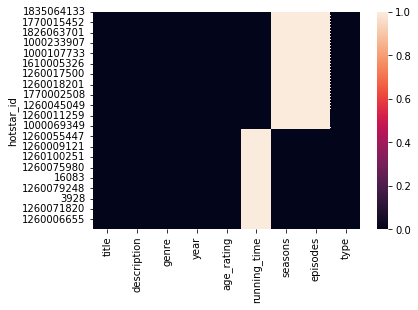

In [13]:
sns.heatmap(df.isnull(),cbar=True)

As length of the shows can be estimated by running_time column, seasons and episodes columns can be droped.

In [16]:
df.drop(columns=['seasons','episodes'],inplace=True)

In [17]:
df.head(5)

,title,description,genre,year,age_rating,running_time,type
hotstar_id,,,,,,,
1835064133,The Ring,Mutually divorced Aman emotionally struggles t...,Drama,2021.0,U/A 13+,17.0,movie
1260015636,Jesus: Rise To Power And Birth Of Christianity,A journey across the historic landscapes of th...,Documentary,2019.0,U/A 13+,42.0,movie
1000070418,Yama Muduru,Krishna Kumar is popular in college for his mu...,Drama,2009.0,U/A 13+,129.0,movie
1770000804,X-Men: The Last Stand,"When humans find a cure for mutation, Professo...",Superhero,2006.0,U/A 13+,103.0,movie
1770005017,Mangalyaan: India's Mission To Mars,"In this special, watch the 650 million km jour...",Documentary,2017.0,U,44.0,movie


Creating a dataset where running_time column is dropped

In [18]:
df1=df.dropna(axis=0,inplace=False,how='any')

In [19]:
df1.isnull().sum()

title           0
description     0
genre           0
year            0
age_rating      0
running_time    0
type            0
dtype: int64

In [20]:
df.age_rating.value_counts()

U/A 13+                  3203
U/A 7+                   1236
U                        1205
U/A 16+                  1130
PG                        422
A                         342
G                         129
12+                        33
15+                        14
English                    10
Kannada                     6
Star Sports 1 Marathi       6
Hindi                       2
Tamil                       2
Star Sports 2               2
Star Vijay                  2
Star Sports Hindi 1         2
Star Suvarna                2
Marathi                     2
Star Sports 1 Telugu        2
Telugu                      2
Star Sports Kannada 1       1
Name: age_rating, dtype: int64

English, Star Sports 1 Marathi, Hindi, Tamil, Star Sports 2, Star Vijay, Star Sports Kannada 1, Star Suvarna, Marathi,Kannada, Star Sports 1 Telugu, Telugu and Star Sports Hindi 1 are not age_rating of shows. So, these instances can be dropped.

In [21]:
dropped_age_rating=['English','Kannada','Star Sports 1 Marathi','Hindi','Tamil','Star Sports 2', 'Star Sports Hindi 1', 'Star Vijay', 'Star Suvarna', 'Marathi', 'Star Sports 1 Telugu', 'Telugu', 'Star Sports Kannada 1']

In [23]:
df=df[df['age_rating'].isin(dropped_age_rating)==False]

In [24]:
df.age_rating.value_counts()

U/A 13+    3203
U/A 7+     1236
U          1205
U/A 16+    1130
PG          422
A           342
G           129
12+          33
15+          14
Name: age_rating, dtype: int64

In [25]:
df['age_rating']=df.age_rating.str.replace('U/A 13+','13')
df['age_rating']=df.age_rating.str.replace('U/A 7+','7')
df['age_rating']=df.age_rating.str.replace('U/A 16+','16')

<ipython-input-25-1ff025fbba2e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['age_rating']=df.age_rating.str.replace('U/A 13+','13')
<ipython-input-25-1ff025fbba2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_rating']=df.age_rating.str.replace('U/A 13+','13')
<ipython-input-25-1ff025fbba2e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['age_rating']=df.age_rating.str.replace('U/A 7+','7')
<ipython-input-25-1ff025fbba2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [27]:
df.age_rating.value_counts()

13+    3203
7+     1236
U      1205
16+    1130
PG      422
A       342
G       129
12+      33
15+      14
Name: age_rating, dtype: int64

In [28]:
df.genre.value_counts()

Drama               2096
Comedy               922
Romance              685
Reality              620
Action               617
Sport                349
Thriller             335
Family               308
Animation            225
Documentary          211
Animals & Nature     160
Kids                 140
Talk Show            135
Crime                116
Mythology            113
Horror               106
Superhero             72
Standup Comedy        52
Adventure             46
Historical            46
Teen                  46
Biopic                45
Lifestyle             43
Science               42
Awards                42
Science Fiction       40
Mystery               29
Concert Film          19
Musical               15
Shorts                10
Food                   9
Docudrama              8
Travel                 8
Fantasy                3
Kabaddi                1
Name: genre, dtype: int64

In [29]:
df.type.value_counts()

movie    4188
tv       3526
Name: type, dtype: int64

In [30]:
df.year.value_counts()

2017.0    691
2021.0    685
2019.0    674
2018.0    600
2020.0    585
         ... 
1958.0      1
1950.0      1
1951.0      1
1960.0      1
1942.0      1
Name: year, Length: 77, dtype: int64

In [41]:
df['year']=df['year'].astype('Int64')
df.dtypes

<ipython-input-41-dbf9000a1103>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['year'].astype('Int64')


title            object
description      object
genre            object
year              Int64
age_rating       object
running_time    float64
type             object
dtype: object

In [42]:
df['year'].head(5)

hotstar_id
1835064133    2021
1260015636    2019
1000070418    2009
1770000804    2006
1770005017    2017
Name: year, dtype: Int64

In [43]:
'Movies are from year {} to {}'.format(np.min(df.year),np.max(df.year))

'Movies are from year 1928 to 2022'